Sales performance of different suppliers:
   warehouse factory_id  pieces_sold
0       W001       F001       977290
1       W001       F002       528793
2       W001       F003       782362
3       W001       F005      1200001
4       W002       F001      1162521
..       ...        ...          ...
76      W019       F005      1069285
77      W020       F001       955667
78      W020       F002       900351
79      W020       F003       593076
80      W020       F005      1087157

[81 rows x 3 columns]


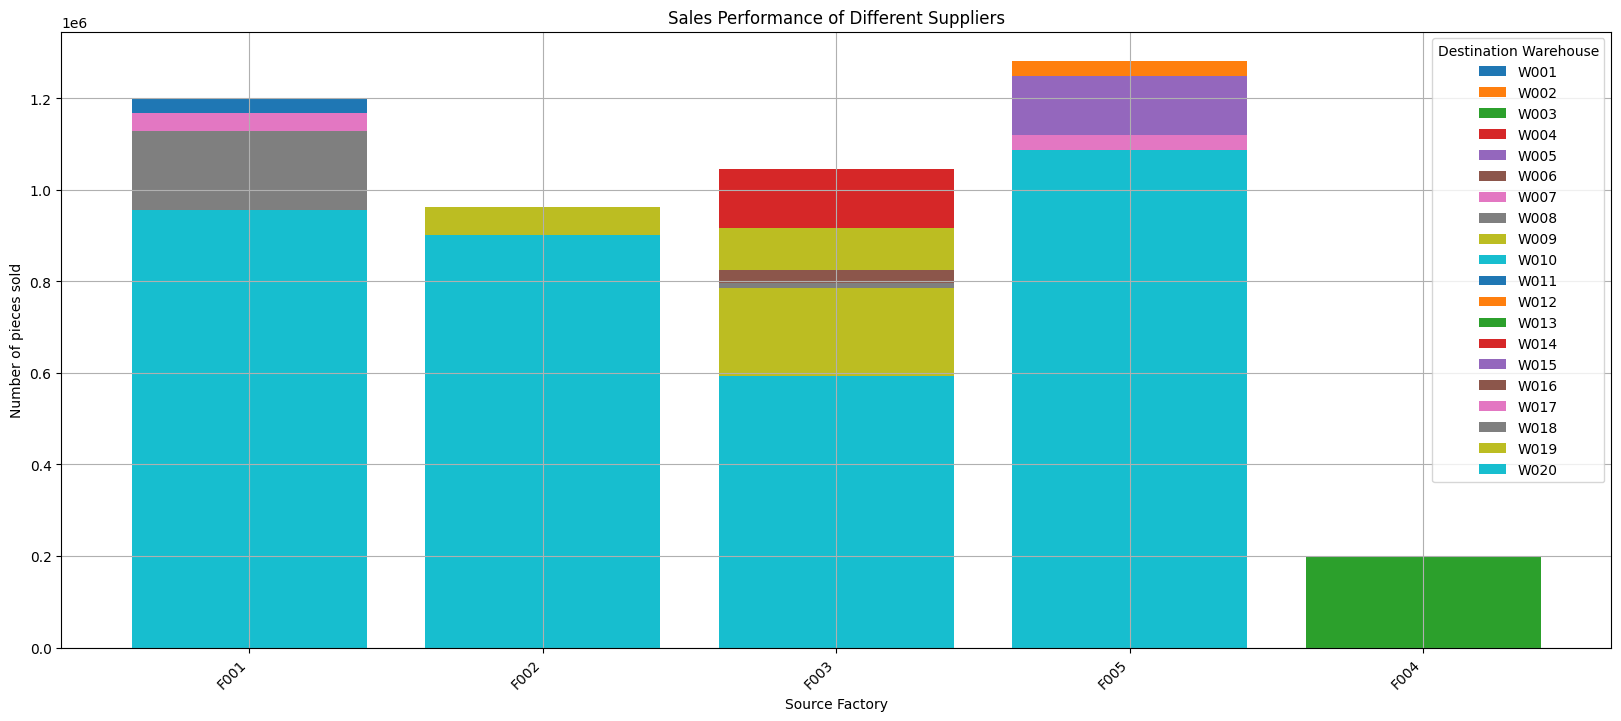

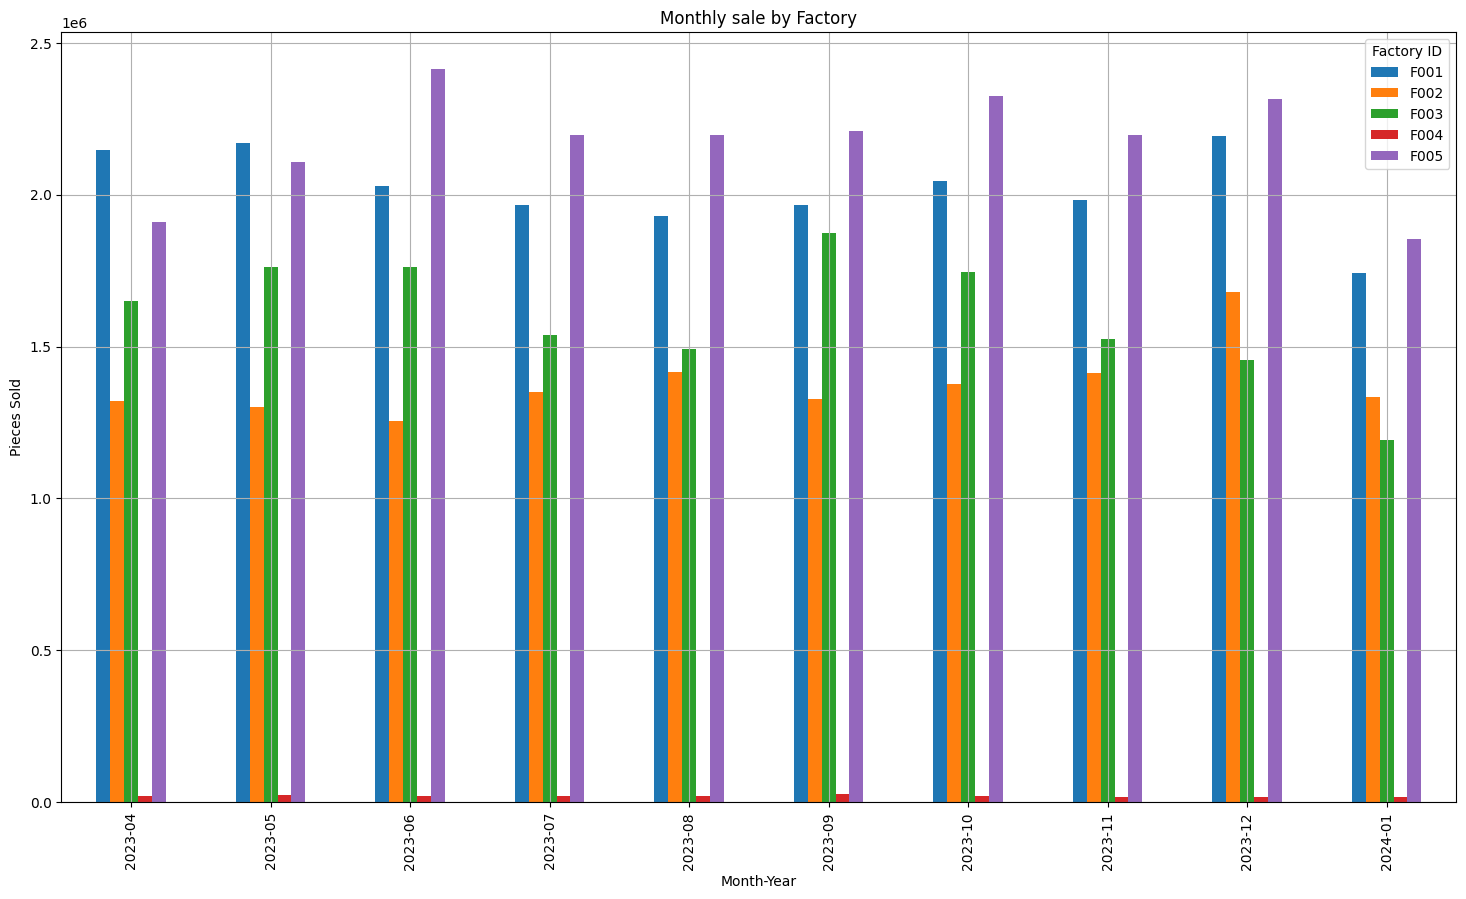

C:\Users\ngocd\AppData\Local\Temp\ipykernel_34080\889704316.py:51: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors = cm.get_cmap('tab20', num_warehouses)


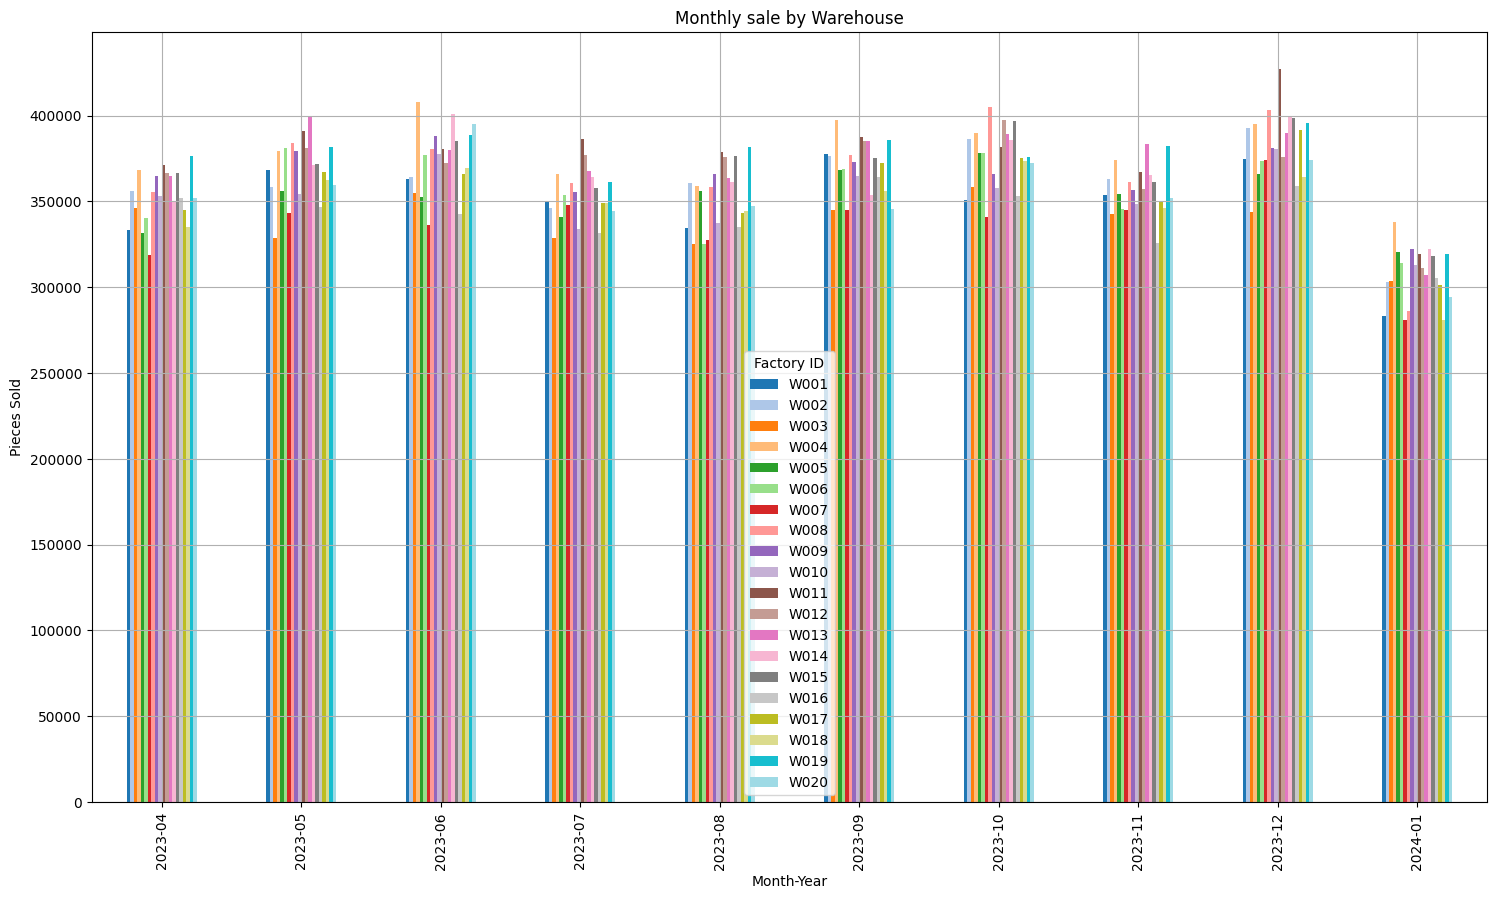

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np
#Load csv file into dataframe
df = pd.read_csv(r'C:\Users\ngocd\source\Github\supply-chain-optimization\data\processed\merged_data.csv')

#Analyze sales performance of different suppliers
supplier_sales = df.groupby(['warehouse', 'factory_id'])['pieces_sold'].sum().reset_index() #group data by warehouse and factory, and sum number of pieces sold
#reset.index is to reset the resulting dataframe to turn the group keys into columns

#Print sales performance of different suppliers
print ("Sales performance of different suppliers:")
print (supplier_sales)

#Plot sales performance of different suppliers
plt.figure(figsize=(20,8))
for warehouse in supplier_sales['warehouse'].unique(): #iterate over each unique destination warehouse
    warehouse_data = supplier_sales[supplier_sales['warehouse'] == warehouse] #filters the data frame for each warehouse
    plt.bar(warehouse_data['factory_id'], warehouse_data['pieces_sold'], label=warehouse) #create a bar chart for each warehouse with factory_id as x-axis, warehouse as y-axis, label each bar
plt.title('Sales Performance of Different Suppliers')
plt.xlabel('Source Factory')
plt.ylabel('Number of pieces sold')
plt.xticks(rotation=45, ha ='right') #rotate the x-axis label to 45 degree for better readability and aligns them to the right hand side
plt.legend(title='Destination Warehouse')
plt.grid(True)
plt.show()

#convert the date column to date time
df['date'] = pd.to_datetime(df['date'])
#Extract the month and year from the 'date' column
df['month_year'] = df['date'].dt.to_period('M')
#Group by factory, and month_year and calculate the sum of pieces sold
performance_by_factory = df.groupby(['factory_id', 'month_year']).agg({'pieces_sold':'sum'}).reset_index()
#Pivot the table to have month_year as index and factory_id, warehouse as columns
pivot_table = performance_by_factory.pivot_table(index='month_year', columns= ['factory_id'], values='pieces_sold', fill_value = 0)
#Plot the performance analysis by factory and warehouse
pivot_table.plot(kind='bar', figsize=(18,10))
plt.xlabel('Month-Year')
plt.ylabel('Pieces Sold')
plt.title('Monthly sale by Factory')
plt.legend(title='Factory ID')
plt.grid(True)
plt.show()

performance_by_warehouse = df.groupby(['warehouse', 'month_year']).agg({'pieces_sold':'sum'}).reset_index()
#Pivot the table to have month_year as index and factory_id, warehouse as columns
pivot_table_warehouse = performance_by_warehouse.pivot_table(index='month_year', columns= ['warehouse'], values='pieces_sold', fill_value = 0)
#Generate unique colors for each warehouse
num_warehouses = len(pivot_table_warehouse.columns)
colors = cm.get_cmap('tab20', num_warehouses)
#Plot the performance analysis by warehouse with unique colors
ax = pivot_table_warehouse.plot(kind='bar', figsize=(18,10), color=[colors(i) for i in range(num_warehouses)])
plt.xlabel('Month-Year')
plt.ylabel('Pieces Sold')
plt.title('Monthly sale by Warehouse')
plt.legend(title='Factory ID')
plt.grid(True)
plt.show()